### Important Steps
1. Import Libraries
2. Read Dataset
3. Import NLP based Libraries
4. Text Preprocessing
   
   4.1 Remove unnecessary characters
   
   4.2 Lowercase the data
   
   4.3 Split the text
   
   4.4 Stemming
   
   4.5 Remove Stop Words
   
   4.6 Join Splitted data
   
   4.7 Tokenization,Vectroisation
   
   4.8 data to x and y
   
   4.9 Split in Train and Test
5. Apply ANN
6. Save Model
7. Do Random Prediction

### Import Libraries 

In [34]:
import pandas as pd
import numpy as np

### Load the Dataset

In [35]:
df=pd.read_csv('Restaurant_Reviews.tsv',delimiter='\t', quoting=3)

In [36]:
df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


### Import NLP based Libraries

In [37]:
import re #Regular Expression :USed to remove unecessary data
import nltk #NLTK tool kit

### Download all Stop words

In [38]:
nltk.download('stopwords')
from nltk.corpus import stopwords #Corpus is knowledgebase where all information related to stop words is stored
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\KIIT\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [39]:
ps=PorterStemmer()

### Taking just first review from dataset applying all data preprocessing techniques over it and then appending it to all the other reviews

In [40]:
df.columns

Index(['Review', 'Liked'], dtype='object')

In [41]:
review=df['Review'][0]
review

'Wow... Loved this place.'

### Remove uncessary data

In [42]:
review=re.sub('[^a-zA-Z]',' ',review)

In [43]:
review  #'Wow... Loved this place.' Converted To ---------->>>> 'Wow    Loved this place '

'Wow    Loved this place '

### Lowercase the text 

#### This is because for a Machine Beautiful / beautiful both are different 

In [44]:
review=review.lower()
review

'wow    loved this place '

### Split the Sentence into List of Words.

#### This is done so that we could check each word to verify its not a stopword .If its a stopward it will be removed .Non -Stopwords will be Stemmed

In [45]:
review=review.split()


In [46]:
review

['wow', 'loved', 'this', 'place']

### Stemming -Convert To root word 

In [47]:
review=[ps.stem(word) for word in review if not word in set(stopwords.words('english'))] #If its not a stop word just ignore if its a stopwards them convert to its root form by stem(word)

In [48]:
review

['wow', 'love', 'place']

### Rejoin the split words

In [49]:
review=" ".join(review)

### Apply transformation on all Rows

In [50]:
data=[]
for i in range(0,1000):
    review=df['Review'][i]
    review=re.sub('[^a-zA-Z]',' ',review)
    review=review.lower()
    review=review.split()
    review=[ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review=" ".join(review)
    data.append(review)
    

In [51]:
data[0:5]

['wow love place',
 'crust good',
 'tasti textur nasti',
 'stop late may bank holiday rick steve recommend love',
 'select menu great price']

### Vectorisation -Similar to one hot encoding

In [52]:
data1=["wow love place","awesome place","wow love atmosphere"]

In [53]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(max_features=5) #Unique values are wow,love,awesome,place and atmosphere
xdummy=cv.fit_transform(data1).toarray()


In [54]:
data1

['wow love place', 'awesome place', 'wow love atmosphere']

In [55]:
xdummy

array([[0, 0, 1, 1, 1],
       [0, 1, 0, 1, 0],
       [1, 0, 1, 0, 1]], dtype=int64)

### To understand how did this happen Refer to Picture

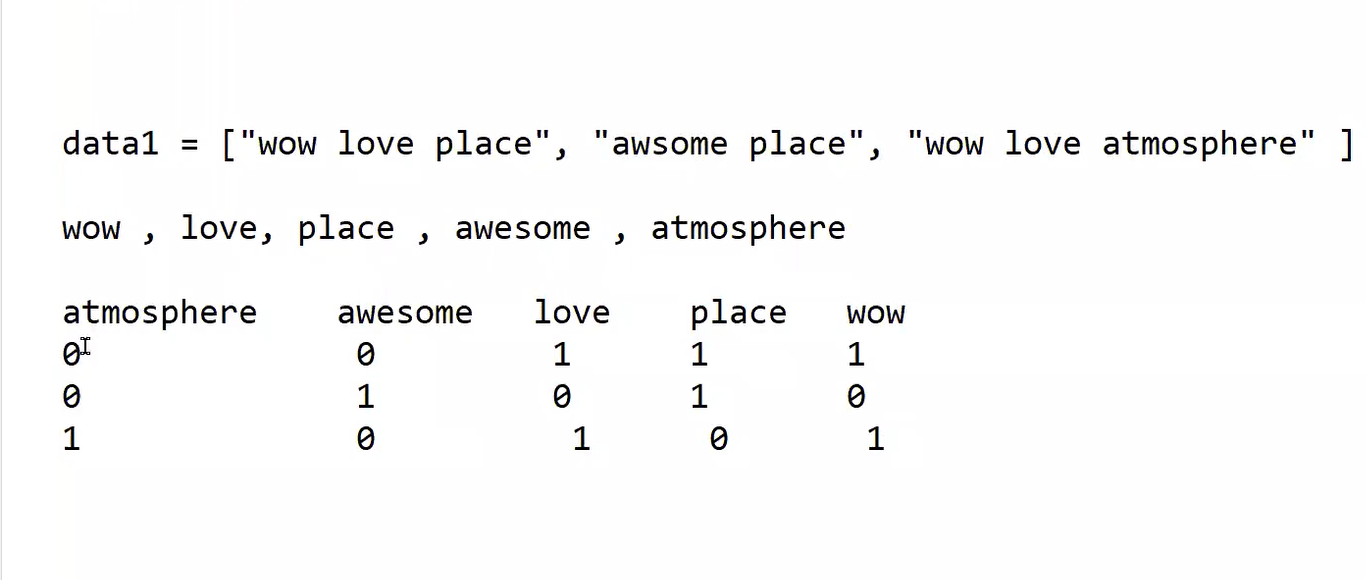

### But in our case we do not know exact number of unique values so we randomly take first 2000 unique value as max_features

In [56]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(max_features=2000) #Top 2000 Unique values 
x=cv.fit_transform(data).toarray()


In [57]:
y=df.iloc[:,1:2].values

In [58]:
len(x[0])  #This means maximum we have only 1565 features

1565

### Train_Test_Split

In [59]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

<IPython.core.display.Javascript object>

In [60]:
x_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

### Apply ANN

In [61]:
from keras.models import Sequential
from keras.layers import Dense

#### Define the model 

In [62]:
model=Sequential()

#### Add a inpur Layer

In [66]:
x.shape

(1000, 1565)

In [64]:
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

### Adding a Input layer

In [68]:
model.add(Dense(units=1565 ,activation='relu'))

### Adding a Hidden Layer

In [70]:
model.add(Dense(units=3200,activation='relu'))

### Adding an Output Layer

In [71]:
model.add(Dense(units=1 ,activation='relu'))

### Configure Learning Process

In [73]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

### Fit the Model

In [76]:
model.fit(x_train,y_train,epochs=10)

Epoch 1/10
25/25 [==============================] - 2s 65ms/step - loss: 0.3451 - accuracy: 0.9337
Epoch 2/10
25/25 [==============================] - 2s 65ms/step - loss: 0.2132 - accuracy: 0.9638
Epoch 3/10
25/25 [==============================] - 2s 65ms/step - loss: 0.2765 - accuracy: 0.9550
Epoch 4/10
25/25 [==============================] - 2s 66ms/step - loss: 0.1801 - accuracy: 0.9800
Epoch 5/10
25/25 [==============================] - 2s 65ms/step - loss: 0.1386 - accuracy: 0.9837
Epoch 6/10
25/25 [==============================] - 2s 65ms/step - loss: 0.1613 - accuracy: 0.9712
Epoch 7/10
25/25 [==============================] - 2s 65ms/step - loss: 0.2089 - accuracy: 0.9700
Epoch 8/10
25/25 [==============================] - 2s 64ms/step - loss: 0.2846 - accuracy: 0.9613
Epoch 9/10
25/25 [==============================] - 2s 64ms/step - loss: 0.1720 - accuracy: 0.9700
Epoch 10/10
25/25 [==============================] - 2s 64ms/step - loss: 0.1798 - accuracy: 0.9862


### Do Prediction

In [77]:
y_pred=model.predict(x_test)

In [79]:
y_pred #Gives us Probability

array([[0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [6.0047126 ],
       [0.        ],
       [0.        ],
       [1.9104118 ],
       [2.5715063 ],
       [2.649724  ],
       [1.6824266 ],
       [4.15008   ],
       [2.7351322 ],
       [6.211397  ],
       [1.4066449 ],
       [0.        ],
       [0.        ],
       [3.8143322 ],
       [0.03660741],
       [0.        ],
       [3.1766932 ],
       [2.0545409 ],
       [1.2036561 ],
       [2.8116586 ],
       [0.6602319 ],
       [5.496784  ],
       [5.958291  ],
       [1.7710576 ],
       [2.0079875 ],
       [2.4262726 ],
       [1.0327117 ],
       [0.        ],
       [3.3186183 ],
       [0.        ],
       [0.        ],
       [1.1864601 ],
       [0.        ],
       [4.629545  ],
       [2.0560455 ],
       [2.3340018 ],
       [0.7398623 ],
       [0.        ],
       [0.        ],
       [0.        ],
       [1.4398097 ],
       [1.559

In [80]:
#Now we need to apply some condition 
y_pred=y_pred>0.5

In [81]:
y_test

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
    

In [82]:
y_pred

array([[False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [

In [85]:
yp=model.predict(cv.transform(['WOW NICE']))
yp>0.5

array([[ True]])

In [91]:
yp=model.predict(cv.transform(['Terrible']))
yp>0.5 #Negative Review

array([[False]])